# Twitter Sentiment Analyses
Sentiment Analysis is a technique used in text mining. It may, therefore, be described as a text mining technique for analyzing the underlying sentiment of a text message, i.e., a tweet. Twitter sentiment or opinion expressed through it may be positive, negative or neutral. However, no algorithm can give you 100% accuracy or prediction on sentiment analysis.
As a part of Natural Language Processing, algorithms like Logidtic Regression, SVM, Random Forest, and  Naive Bayes is used in predicting the polarity of the sentence. sentiment analysis of Twitter data may also depend upon sentence level and document level.

- Import DataSets
- Text Preprocessing 
- Visualization
- Machine Learning Algorithm
- Accuracy and F1-Score
- conclusion

In [2]:
# import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import nltk
import re 
import string

In [3]:
# Facht the dataset 
train_data = pd.read_csv("D:\\Desktop\\datasets\\twitter\\train.csv")
test_data = pd.read_csv("D:\\Desktop\\datasets\\twitter\\test.csv")

In [4]:
# Let's See dataset
train_data.head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
# Check training data -> how many +ve and -ve tweets
train_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

C:\Users\IRON MAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

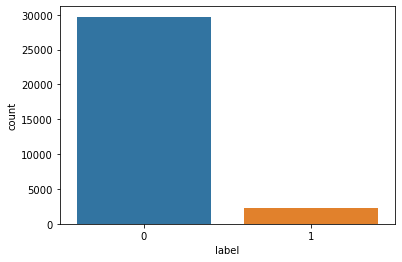

In [6]:
#Let's Visualize the +ve and -ve tweets
sns.countplot(train_data['label'])

In [7]:
# Lest's check +ve twees once
train_data[train_data['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


In [8]:
# Let's check shape of our train data
train_data.shape

(31962, 3)

In [9]:
# Now Let's combine the dataset to make single main datasets
whole_datasets = train_data.append(test_data,ignore_index=True)  #train and test dataset are combined
whole_datasets.shape

(49159, 3)

In [10]:
whole_datasets.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


<AxesSubplot:ylabel='label'>

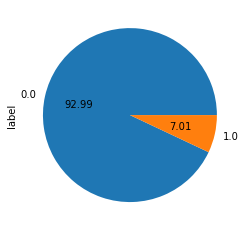

In [11]:
#let's visualisze the whole data sets
whole_datasets['label'].value_counts().plot(kind='pie', autopct='%.2f')

C:\Users\IRON MAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

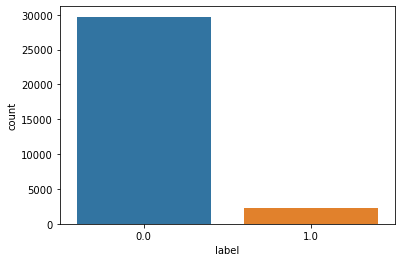

In [12]:
sns.countplot(whole_datasets['label'])

# Text Preprocessing 
- <b> Regulat Expression</b>
- <b> Stop Word Removal</b>
- <b> Tokenization</b>
- <b> Stemming</b>
- <b> Final Text Preprocessing Model</b>

In [13]:
whole_datasets['clean_tweet'] = whole_datasets['tweet']
whole_datasets.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## Regular Expressions

In [14]:
# Now remove the @tag or twitter handle
def remove_pattern(input_text,pattern):
    r = re.findall(pattern,input_text)
    for pattern in r:
        input_text = re.sub(pattern, '', input_text)
    return input_text

In [15]:
whole_datasets['clean_tweet'] = np.vectorize(remove_pattern)(whole_datasets['clean_tweet'],"@[\w]*")

In [16]:
whole_datasets.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
whole_datasets['clean_tweet'] =whole_datasets['clean_tweet'].str.replace("[^a-zA-Z#]"," ")

In [18]:
whole_datasets.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


## Stope word Removal

In [19]:
whole_datasets['clean_tweet'] =whole_datasets['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [20]:
whole_datasets.head()

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


## Tokenization of the clean_tweet

In [21]:
tokenize_tweet = whole_datasets['clean_tweet'].apply(lambda x:x.split()) #it will spilt in the form of word
tokenize_tweet.head(10)

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
5    [huge, fare, talking, before, they, leave, cha...
6                           [camping, tomorrow, danny]
7    [next, school, year, year, exams, think, about...
8    [love, land, #allin, #cavs, #champions, #cleve...
9                                      [welcome, here]
Name: clean_tweet, dtype: object

## Apply Stemming

In [22]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tokenize_tweet = tokenize_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [23]:
tokenize_tweet.head(10)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
5    [huge, fare, talk, befor, they, leav, chao, di...
6                              [camp, tomorrow, danni]
7    [next, school, year, year, exam, think, about,...
8    [love, land, #allin, #cav, #champion, #clevela...
9                                       [welcom, here]
Name: clean_tweet, dtype: object

In [24]:
# Now Recreate the clean_tweet by combining tokenize_tweet
for i in range (len(tokenize_tweet)):
    tokenize_tweet[i] = ' '.join(tokenize_tweet[i]) #Concatinate th all words 

#After concatination just copied in clean_tweet
whole_datasets['clean_tweet'] = tokenize_tweet

## Final Tweets after Text Preprocessing

In [25]:
whole_datasets.head(10)

,id,label,tweet,clean_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talk befor they leav chao disput whe...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð...,next school year year exam think about that #s...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cav #champion #cleveland #cl...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcom here


# See WordCloud (Postive, Negative)
- <b> Visualize the all Words</b>
- <b> Visualize the Postive Words (label =0)</b>
- <b> Visualize the Negative Words (label =1)</b>

## Visualize the all Words

In [26]:
!pip install wordcloud

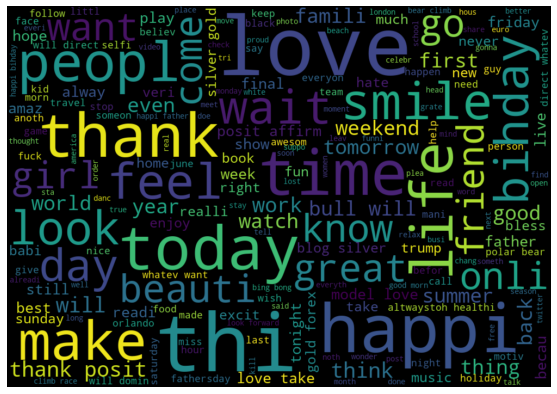

In [27]:
from wordcloud import WordCloud
all_words = ' '.join([word for word in whole_datasets['clean_tweet']])
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1000,height=700,random_state=25,max_font_size=150).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Visualize the Postive Words 

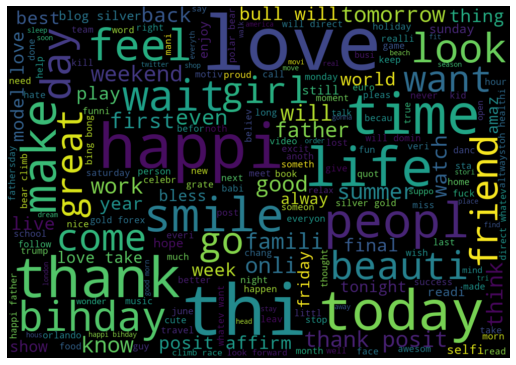

In [28]:
from wordcloud import WordCloud
postive_word = ' '.join([word for word in whole_datasets['clean_tweet'][whole_datasets['label']==0]])
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1000,height=700,random_state=25,max_font_size=150).generate(postive_word)
plt.figure(figsize=(9,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Visualize the Negative Words 

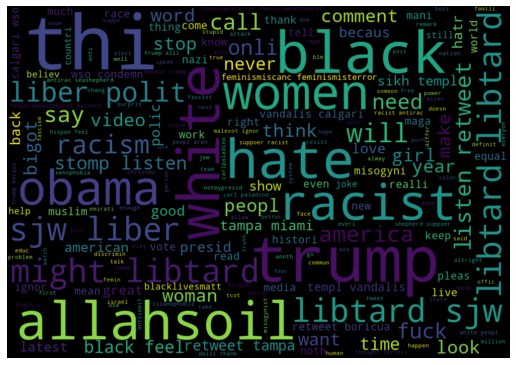

In [29]:
from wordcloud import WordCloud
negative_words = ' '.join([word for word in whole_datasets['clean_tweet'][whole_datasets['label']==1]])
# Create and generate a word cloud image:
wordcloud = WordCloud(width=1000,height=700,random_state=25,max_font_size=150).generate(negative_words)
plt.figure(figsize=(9,7))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Extracting the Hash Tag (#)
- Count and Visualize the postive Hash Tag words
- Count and Visualize the Negative Hash Tag words

In [30]:
# Collect the Hash Tag
def extrac_hashtag(input):
    hashtag = []
    for i in input:
        ht = re.findall(r"#(\w+)",i)
        hashtag.append(ht)
    return hashtag

In [31]:
pos_hashtag = extrac_hashtag(whole_datasets['clean_tweet'][whole_datasets['label']==0])
pos_hashtag = sum(pos_hashtag,[])

In [32]:
neg_hashtag = extrac_hashtag(whole_datasets['clean_tweet'][whole_datasets['label']==1])
neg_hashtag = sum(neg_hashtag,[])


## Count and Visualize the postive Hash Tag words

In [33]:
# Create the Freq.. table like <Key,value> Pair with nltk libtrary
pos_hashtag_word = nltk.FreqDist(pos_hashtag)
pos_hashtag_word

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

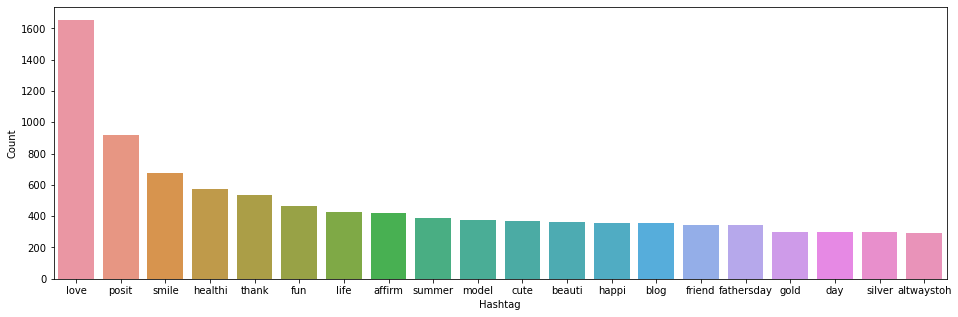

In [34]:
#Let's Visualize the # postive word
pos_dataFrame = pd.DataFrame({'Hashtag': list(pos_hashtag_word.keys()),'Count':list(pos_hashtag_word.values())})

#selecting top 20 most frequent hashtags
pos_dataFrame = pos_dataFrame.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=pos_dataFrame, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

## Count and Visualize the Negative Hash Tag words

In [35]:
# Create the Freq.. table like <Key,value> Pair with nltk libtrary
neg_hashtag_word = nltk.FreqDist(neg_hashtag)
neg_hashtag_word

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

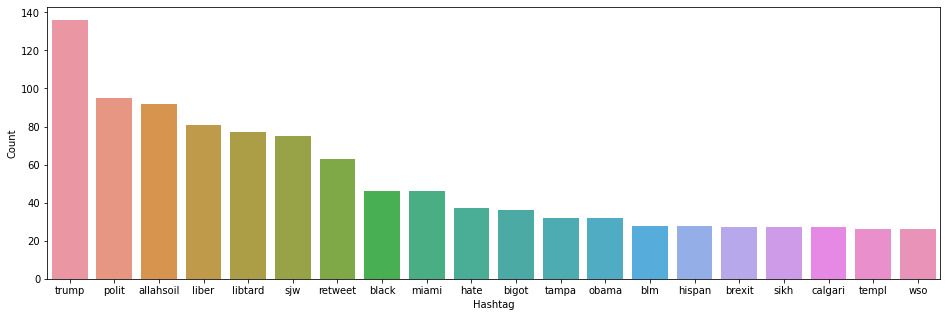

In [36]:
#Let's Visualize the # postive word
neg_dataFrame = pd.DataFrame({'Hashtag': list(neg_hashtag_word.keys()),'Count':list(neg_hashtag_word.values())})

#selecting top 20 most frequent hashtags
neg_dataFrame = neg_dataFrame.nlargest(columns="Count",n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=neg_dataFrame, x="Hashtag", y="Count")
ax.set(ylabel = "Count")
plt.show()

# Vectorization Process
- <b>Bags of Word(BOW) Vectorization</b>
- <b>TF-IDF Vectorization</b>

In [37]:
# import the Library
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

### Bags of Word(BOW) Vectorization

In [38]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(whole_datasets['clean_tweet'])
bow.shape

(49159, 1000)

### TF-IDF Vectorization

In [39]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(whole_datasets['clean_tweet'])
tfidf.shape

(49159, 1000)

# Model Architecture
- <b>Logistic Regression</b>
- <b>Support Vector Machine</b>
- <b>Random Forest</b>
- <b> Naive Bayes</b>

## Logistic Regression In BOW Feature

In [108]:
from sklearn.model_selection import train_test_split
whole_datasets = whole_datasets.fillna(0)
x_train_bow,x_test_bow,y_train_bow,y_test_bow = train_test_split(bow,whole_datasets['label'],test_size=0.2,random_state=0)

In [109]:
print(x_train_bow.shape)
print(x_test_bow.shape)
print(y_train_bow.shape)
print(y_test_bow.shape)

(39327, 1000)
(9832, 1000)
(39327,)
(9832,)


In [110]:
from sklearn.linear_model import LogisticRegression
logistic_model_bow = LogisticRegression()
logistic_model_bow.fit(x_train_bow,y_train_bow)

LogisticRegression()

In [111]:
predicted_logistic_model_bow = logistic_model_bow.predict(x_test_bow)

In [112]:
from sklearn.metrics import accuracy_score
score_logistic_bow = accuracy_score(predicted_logistic_model_bow, y_test_bow)
print("Accuracy with Logistic Regression in BOW Feature: ",score_logistic_bow)

Accuracy with Logistic Regression in BOW Feature:  0.9575874694873882


In [113]:
from sklearn.metrics import f1_score
print( "F1 Score Logistic Regression in BOW Feature is ",f1_score(y_test_bow, predicted_logistic_model_bow))

F1 Score Logistic Regression in BOW Feature is  0.2920203735144312


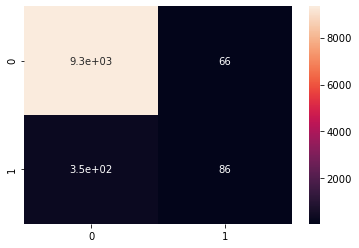

In [114]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_bow, predicted_logistic_model_bow)
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

## Logistic Regression In TF-IDF Feature

In [78]:
from sklearn.model_selection import train_test_split
x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(tfidf,whole_datasets['label'],test_size=0.2,random_state=0)

In [81]:
logistic_model_tfidf = LogisticRegression()
logistic_model.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression()

In [82]:
predicted_logistic_model_tfidf = logistic_model.predict(x_test_tfidf)

In [83]:
from sklearn.metrics import accuracy_score
score_logistic_tfidf = accuracy_score(predicted_logistic_model_tfidf, y_test_tfidf)
print("Accuracy with Logistic Regression in TF-IDF Feature: ",score_logistic_tfidf)

Accuracy with Logistic Regression in TF-IDF Feature:  0.9579943043124491


In [86]:
from sklearn.metrics import f1_score
print( "F1 Score is Logistic Regression in TF-IDF Feature",f1_score(y_test_tfidf, predicted_logistic_model_tfidf))

F1 Score is Logistic Regression in TF-IDF Feature 0.2477231329690346


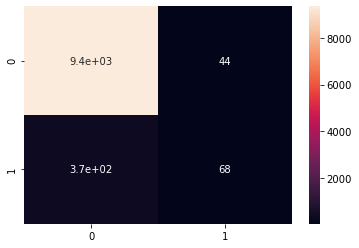

In [87]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_tfidf, predicted_logistic_model_tfidf)
sns.heatmap(cm,annot=True)
plt.savefig('h1.png')

## Support Vector Machine in BOW Feature

In [88]:
from sklearn import svm
svc_bow = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train_bow, y_train_bow)


In [89]:
predicted_svm_model_bow = svc_bow.predict(x_test_bow)

In [90]:
from sklearn.metrics import accuracy_score
score_svm_bow = accuracy_score(predicted_svm_model_bow, y_test_bow)
print("Accuracy with SVM in BOW Feature: ",score_svm_bow)

Accuracy with SVM in BOW Feature:  0.9590113913751017


In [126]:
from sklearn.metrics import f1_score
print( "F1 Score SVM in BOW Feature is ",f1_score(y_test_bow, predicted_svm_model_bow))

F1 Score SVM in BOW Feature is  0.2610294117647059


## Support Vector Machine in TF-IDF Feature

In [92]:
from sklearn import svm
svm_tfidf = svm.SVC(kernel='linear', C=1, probability=True).fit(x_train_tfidf, y_train_tfidf)


In [93]:
predicted_svm_model_tfidf = svm_tfidf.predict(x_test_tfidf)

In [94]:
from sklearn.metrics import accuracy_score
score_svm_tfidf = accuracy_score(predicted_svm_model_tfidf, y_test_tfidf)
print("Accuracy with SVM in TF-IDF Feature: ",score_svm_tfidf)

Accuracy with SVM in TF-IDF Feature:  0.9590113913751017


In [116]:
from sklearn.metrics import f1_score
print( "F1 Score SVM in TF-IDF Feature is ",f1_score(y_test_tfidf, predicted_svm_model_tfidf))

F1 Score SVM in TF-IDF Feature is  0.21135029354207435


## Random Forest in BOW Feature

In [100]:
from sklearn.ensemble import RandomForestClassifier
rf_bow = RandomForestClassifier(n_estimators=400, random_state=11).fit(x_train_bow, y_train_bow)


In [101]:
predicted_rf_model_bow = rf_bow.predict(x_test_bow)

In [102]:
from sklearn.metrics import accuracy_score
score_rf_bow = accuracy_score(predicted_rf_model_bow, y_test_bow)
print("Accuracy with Rendom Forest in BOW Feature: ",score_rf_bow)

Accuracy with Rendom Forest in BOW Feature:  0.9525020341741253


In [115]:
from sklearn.metrics import f1_score
print( "F1 Score Random Forest in BOW Feature is ",f1_score(y_test_tfidf,predicted_rf_model_bow))

F1 Score Random Forest in BOW Feature is  0.3431786216596343


## Random Forest in TF-IDF Feature

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf_tfidf = RandomForestClassifier(n_estimators=400, random_state=11).fit(x_train_tfidf, y_train_tfidf)


In [105]:
predicted_rf_model_tfidf = rf_tfidf.predict(x_test_tfidf)

In [106]:
from sklearn.metrics import accuracy_score
score_rf_tfidf = accuracy_score(predicted_rf_model_tfidf, y_test_tfidf)
print("Accuracy with Rendom Forest in BOW Feature: ",score_rf_tfidf)

Accuracy with Rendom Forest in BOW Feature:  0.9570789259560618


In [117]:
from sklearn.metrics import f1_score
print( "F1 Score Rendom Forest in TF-IDF Feature is ",f1_score(y_test_tfidf, predicted_rf_model_tfidf))

F1 Score Rendom Forest in TF-IDF Feature is  0.3322784810126582


## Naive Bayes in BOW Feature

In [119]:
from sklearn.naive_bayes import MultinomialNB  
model_naive_bow = MultinomialNB().fit(x_train_bow, y_train_bow) 
predicted_naive_bow = model_naive_bow.predict(x_test_bow)

In [120]:
from sklearn.metrics import accuracy_score
score_naive_bow= accuracy_score(predicted_naive_bow, y_test_bow)
print("Accuracy with Naive Bayes in BOW Feature: ",score_naive_bow)

Accuracy with Naive Bayes in BOW Feature:  0.9430431244914564


In [121]:
from sklearn.metrics import f1_score
print( "F1 Score Naive Bayes in BOW Feature is ",f1_score(y_test_bow, predicted_naive_bow ))

F1 Score Naive Bayes in BOW Feature is  0.391304347826087


## Naive Bayes in TF-IDF Feature

In [122]:
from sklearn.naive_bayes import MultinomialNB  
model_naive_tfidf = MultinomialNB().fit(x_train_tfidf, y_train_tfidf) 
predicted_naive_tfidf = model_naive_tfidf.predict(x_test_tfidf)

In [123]:
from sklearn.metrics import accuracy_score
score_naive_tfidf= accuracy_score(predicted_naive_bow, y_test_tfidf)
print("Accuracy with Naive Bayes in TF-IDF Feature: ",score_naive_tfidf)

Accuracy with Naive Bayes in TF-IDF Feature:  0.9430431244914564


In [125]:
from sklearn.metrics import f1_score
print( "F1 Score Naive Bayes in TF-IDF Feature is ",f1_score(y_test_tfidf, predicted_naive_tfidf))

F1 Score Naive Bayes in TF-IDF Feature is  0.22264150943396227


# Conclusion
- <b>All Model in BOW Feature Accuracy and F1 Score</b>
- <b>All Model in TF-IDF Feature Accuracy and F1 Score</b>

## All Model in BOW Feature Accuracy and F1 Score

In [127]:
print("Accuracy with Logistic Regression in BOW Feature: ",score_logistic_bow)
print( "F1 Score Logistic Regression in BOW Feature is ",f1_score(y_test_bow, predicted_logistic_model_bow))
print("Accuracy with SVM in BOW Feature: ",score_svm_bow)
print( "F1 Score SVMn in BOW Feature is ",f1_score(y_test_bow, predicted_svm_model_bow))
print("Accuracy with Rendom Forest in BOW Feature: ",score_rf_bow)
print( "F1 Score Random Forest in BOW Feature is ",f1_score(y_test_tfidf,predicted_rf_model_bow))
print("Accuracy with Naive Bayes in BOW Feature: ",score_naive_bow)
print( "F1 Score Naive Bayes in BOW Feature is ",f1_score(y_test_bow, predicted_naive_bow ))


Accuracy with Logistic Regression in BOW Feature:  0.9575874694873882
F1 Score Logistic Regression in BOW Feature is  0.2920203735144312
Accuracy with SVM in BOW Feature:  0.9590113913751017
F1 Score SVMn in BOW Feature is  0.2610294117647059
Accuracy with Rendom Forest in BOW Feature:  0.9525020341741253
F1 Score Random Forest in BOW Feature is  0.3431786216596343
Accuracy with Naive Bayes in BOW Feature:  0.9430431244914564
F1 Score Naive Bayes in BOW Feature is  0.391304347826087


## All Model in TF-IDF Feature Accuracy and F1 Score

In [128]:

print("Accuracy with Logistic Regression in TF-IDF Feature: ",score_logistic_tfidf)
print( "F1 Score is Logistic Regression in TF-IDF Feature",f1_score(y_test_tfidf, predicted_logistic_model_tfidf))
print("Accuracy with SVM in TF-IDF Feature: ",score_svm_tfidf)
print( "F1 Score SVM in TF-IDF Feature is ",f1_score(y_test_tfidf, predicted_svm_model_tfidf))
print("Accuracy with Rendom Forest in BOW Feature: ",score_rf_tfidf)
print( "F1 Score Rendom Forest in TF-IDF Feature is ",f1_score(y_test_tfidf, predicted_rf_model_tfidf))
print("Accuracy with Naive Bayes in TF-IDF Feature: ",score_naive_tfidf)
print( "F1 Score Naive Bayes in TF-IDF Feature is ",f1_score(y_test_tfidf, predicted_naive_tfidf))

Accuracy with Logistic Regression in TF-IDF Feature:  0.9579943043124491
F1 Score is Logistic Regression in TF-IDF Feature 0.2477231329690346
Accuracy with SVM in TF-IDF Feature:  0.9590113913751017
F1 Score SVM in TF-IDF Feature is  0.21135029354207435
Accuracy with Rendom Forest in BOW Feature:  0.9570789259560618
F1 Score Rendom Forest in TF-IDF Feature is  0.3322784810126582
Accuracy with Naive Bayes in TF-IDF Feature:  0.9430431244914564
F1 Score Naive Bayes in TF-IDF Feature is  0.22264150943396227


## Better in all formet
<b>Accuracy with Naive Bayes in BOW Feature:  0.9430431244914564</b>

<b>F1 Score Naive Bayes in BOW Feature is  0.391304347826087</b>